# OLS Regression: High Blood Pressure
Ordinary least squares regression will be used to evaluate strength of explanatory variables and to aid in the initial reduction of variables

## High Blood Pressure

In [1]:
import sys
import pandas as pd
import geopandas as gpd  # Spatial data manipulation
!{sys.executable} -m pip install CensusData
!{sys.executable} -m pip install pandas-datapackage-reader
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('fipsmerge.csv', dtype={'FIPS': str})

In [3]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df.head()

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CERVICAL_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,CHOLSCREEN_AdjPrev,COLON_SCREEN_AdjPrev,COPD_AdjPrev,COREM_AdjPrev,COREW_AdjPrev,CSMOKING_AdjPrev,DENTAL_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,GHLTH_AdjPrev,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev,COUNTY_NAME,SchoolSegregation,ChildcareCostBurden,Dentists,HighSchoolCompletion,SomeCollege,Unemployment,ChildrenInPoverty,IncomeInequality,ChildrenSingleParentHH,AirPollution_2019_23,DrinkingWaterViolations,DrivingAloneToWork,LongCommute,DisconnectedYouth,GenderPayGap,MedianHHIncome,ChildrenFreeReducedPriceLunch,ResidentialSegregation,Homeownership,SevereHousingCostBurden,BroadbandAccess,Population,AgeBelow18,Age65Older,Black,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,Hispanic,White,NotProficientEnglish,Female,PrematureDeath,PoorFairHealth,PoorPhysicalHealthDays,PoorMentalHealthDays,LowBirthweight,AdultSmoking,AdultObesity,FoodEnvironmentIndex,PhysicalInactivity,AccesstoExerciseOpportunities,ExcessiveDrinking,AlcoholImpairedDrivingDeaths,STI,TeenBirths,Uninsured,PrimaryCarePhysicians,PreventableHospitalStays,MammographyScreening,FluVaccinations,SocialAssociations,InjuryDeaths,AirPollution_2019,HHighHousingCosts,HHwOvercrowding,HHwLackKitchenPlumbingFacilities,LifeExpectancy,PrematureAgeAdjustedMortality,ChildMortality,InfantMortality,FrequentPhysicalDistress,DiabetesPrevalence,HIVPrevalence,FoodInsecurity,DrugOverdoseDeaths,UninsuredAdults,UninsuredChildren,HighSchoolGraduation,ChildrenEligibleFreeReducedLunch,Residential,ChildCareCenters,Homicides,Suicides,FirearmFatalities,MotorVehicleCrashDeaths,JuvenileArrests,FormalJuvenileDelinquencyCases,InformalJuvenileDelinquencyCases,Rural,AIRQUALTY_MEAN
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.794400,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.300710,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533
2,01005,Alabama,Barbour,AL,17.2,30.6,13.4,44.3,68.4,5.9,11.4,81.8,7.5,76.6,82.2,69.0,9.7,36.9,33.2,25.0,47.6,22.6,15.6,27.3,33.5,3.7,40.2,72.5,20.5,43.4,15.8,43.9,4

In [9]:
# Target area
# drop rows with missing values // df = dfmw.dropna()
# drop florida missing rows

df = df.drop(df[df['STATE_NAME'] == 'Florida'].index)

#selected variables 
dfs = df[['BPHIGH_AdjPrev', 'MOBILITY_AdjPrev', 'STROKE_AdjPrev',
       'DIABETES_AdjPrev', 'DiabetesPrevalence', 'INDEPLIVE_AdjPrev',
       'GHLTH_AdjPrev', 'PoorFairHealth', 'PhysicalInactivity', 'LPA_AdjPrev',
       'DISABILITY_AdjPrev', 'BPMED_AdjPrev', 'SELFCARE_AdjPrev',
       'TEETHLOST_AdjPrev', 'COGNITION_AdjPrev', 'KIDNEY_AdjPrev',
       'SLEEP_AdjPrev', 'FrequentPhysicalDistress', 'PHLTH_AdjPrev',
       'VISION_AdjPrev', 'ChildrenInPoverty', 'PoorPhysicalHealthDays',
       'DENTAL_AdjPrev', 'AdultObesity', 'OBESITY_AdjPrev', 'CSMOKING_AdjPrev',
       'AdultSmoking', 'ARTHRITIS_AdjPrev', 'MHLTH_AdjPrev', 'FoodInsecurity',
       'Black', 'BINGE_AdjPrev', 'ExcessiveDrinking', 'AIRQUALTY_MEAN']]


In [10]:
#checking for missing values
dfs.isna().sum()

BPHIGH_AdjPrev              0
MOBILITY_AdjPrev            0
STROKE_AdjPrev              0
DIABETES_AdjPrev            0
DiabetesPrevalence          0
INDEPLIVE_AdjPrev           0
GHLTH_AdjPrev               0
PoorFairHealth              0
PhysicalInactivity          0
LPA_AdjPrev                 0
DISABILITY_AdjPrev          0
BPMED_AdjPrev               0
SELFCARE_AdjPrev            0
TEETHLOST_AdjPrev           0
COGNITION_AdjPrev           0
KIDNEY_AdjPrev              0
SLEEP_AdjPrev               0
FrequentPhysicalDistress    0
PHLTH_AdjPrev               0
VISION_AdjPrev              0
ChildrenInPoverty           0
PoorPhysicalHealthDays      0
DENTAL_AdjPrev              0
AdultObesity                0
OBESITY_AdjPrev             0
CSMOKING_AdjPrev            0
AdultSmoking                0
ARTHRITIS_AdjPrev           0
MHLTH_AdjPrev               0
FoodInsecurity              0
Black                       0
BINGE_AdjPrev               0
ExcessiveDrinking           0
AIRQUALTY_

In [11]:
#county count
len(dfs)

3041

In [12]:
# drop the 8 counties without 'AIRQUALITY_MEAN' data
dfs = dfs.dropna()

In [13]:
#county count
len(dfs)

3033

# Correlation Matrix

## Checking for multi colinearity
Below is a look at colinearity between the independent variables. The final features used need to have below a .7 correlation with any other indpendent variable used. Anything above that and they should not be used together in a linear or GWR model. 

Gradually refine the list of indendent variables until there are no features that have a high correlation (> .7) with each other.

In [18]:
# absolute value of Pearson's r
corr = dfs.corr().abs() 
display(corr)

,BPHIGH_AdjPrev,MOBILITY_AdjPrev,STROKE_AdjPrev,DIABETES_AdjPrev,DiabetesPrevalence,INDEPLIVE_AdjPrev,GHLTH_AdjPrev,PoorFairHealth,PhysicalInactivity,LPA_AdjPrev,DISABILITY_AdjPrev,BPMED_AdjPrev,SELFCARE_AdjPrev,TEETHLOST_AdjPrev,COGNITION_AdjPrev,KIDNEY_AdjPrev,SLEEP_AdjPrev,FrequentPhysicalDistress,PHLTH_AdjPrev,VISION_AdjPrev,ChildrenInPoverty,PoorPhysicalHealthDays,DENTAL_AdjPrev,AdultObesity,OBESITY_AdjPrev,CSMOKING_AdjPrev,AdultSmoking,ARTHRITIS_AdjPrev,MHLTH_AdjPrev,FoodInsecurity,Black,BINGE_AdjPrev,ExcessiveDrinking,AIRQUALTY_MEAN
BPHIGH_AdjPrev,1.000000,0.890401,0.876973,0.868062,0.868062,0.862169,0.847021,0.847021,0.833702,0.833702,0.825597,0.819223,0.813616,0.809244,0.803530,0.793239,0.790456,0.785881,0.785881,0.775626,0.765405,0.760854,0.754958,0.733739,0.733739,0.721520,0.721520,0.717204,0.713689,0.690008,0.687982,0.678724,0.671184,0.190208
MOBILITY_AdjPrev,0.890401,1.000000,0.916601,0.901856,0.901856,0.980320,0.960854,0.960854,0.906875,0.906875,0.974315,0.664253,0.920338,0.924006,0.961543,0.873523,0.760053,0.947942,0.947942,0.897099,0.845706,0.909066,0.870038,0.687996,0.687996,0.824116,0.824116,0.696916,0.840567,0.828937,0.463268,0.716685,0.714093,0.167713
STROKE_AdjPrev,0.876973,0.916601,1.000000,0.928689,0.928689,0.940480,0.908879,0.908879,0.829642,0.829642,0.851484,0.628746,0.962180,0.882250,0.855850,0.949643,0.717407,0.865947,0.865947,0.930278,0.873746,0.802225,0.800153,0.679141,0.679141,0.781296,0.781296,0.621433,0.728078,0.762530,0.629214,0.612613,0.608327,0.094789
DIABETES_AdjPrev,0.868062,0.901856,0.928689,1.000000,1.000000,0.900912,0.927081,0.927081,0.849469,0.849469,0.827392,0.637028,0.948995,0.810612,0.806092,0.955362,0.740495,0.831044,0.831044,0.951004,0.831802,0.769075,0.819451,0.682390,0.682390,0.657982,0.657982,0.516785,0.667091,0.745065,0.611337,0.670929,0.618502,0.131310
DiabetesPrevalence,0.868062,0.901856,0.928689,1.000000,1.000000,0.900912,0.927081,0.927081,0.849469,0.849469,0.827392,0.637028,0.948995,0.810612,0.806092,0.955362,0.740495,0.831044,0.831044,0.951004,0.831802,0.769075,0.819451,0.682390,0.682390,0.657982,0.657982,0.516785,0.667091,0.745065,0.611337,0.670929,0.618502,0.131310
INDEPLIVE_AdjPrev,0.862169,0.980320,0.940480,0.900912,0.900912,1.000000,0.962748,0.962748,0.877360,0.877360,0.949075,0.615869,0.947677,0.933959,0.963820,0.896939,0.754628,0.963195,0.963195,0.917797,0.869926,0.919442,0.864433,0.667813,0.667813,0.845178,0.845178,0.708601,0.864225,0.836325,0.458504,0.678125,0.687191,0.118885
GHLTH_AdjPrev,0.847021,0.960854,0.908879,0.927081,0.927081,0.962748,1.000000,1.000000,0.892193,0.892193,0.929649,0.579474,0.947059,0.892923,0.932220,0.910609,0.741768,0.949588,0.949588,0.942966,0.846624,0.912578,0.909481,0.659637,0.659637,0.767034,0.767034,0.610497,0.812419,0.827903,0.442742,0.682512,0.666203,0.139674
PoorFairHealth,0.847021,0.960854,0.908879,0.927081,0.927081,0.962748,1.000000,1.000000,0.892193,0.892193,0.929649,0.579474,0.947059,0.892923,0.932220,0.910609,0.741768,0.949588,0.949588,0.942966,0.846624,0.912578,0.909481,0.659637,0.659637,0.767034,0.767034,0.610497,0.812419,0.827903,0.442742,0.682512,0.666203,0.139674
PhysicalInactivity,0.833702,0.906875,0.829642,0.849469,0.849469,0.877360,0.892193,0.892193,1.000000,1.000000,0.871445,0.715551,0.843434,0.867314,0.848315,0.787549,0.701143,0.847902,0.847902,0.818775,0.755516,0.803084,0.843671,0.780641,0.780641,0.814884,0.814884,0.617651,0.722914,0.722815,0.393588,0.556385,0.610845,0.206199
LPA_AdjPrev,0.833702,0.906875,0.829642,0.849469,0.849469,0.877360,0.892193,0.892193,1.000000,1.000000,0.871445,0.715551,0.843434,0.867314,0.848315,0.787549,0.701143,0.847902,0.847902,0.818775,0.755516,0.803084,0.843671,0.780641,0.780641,0.814884,0.814884,0.617651,0.722914,0.722815,0.393588,0.556385,0.610845,0.206199


In [15]:
corr_pairs = corr.unstack()

# filter the correlations above to show only those under .7
filtered_corr = corr_pairs[(corr_pairs < 0.7) & (corr_pairs > 0)]
filtered_corr

BPHIGH_AdjPrev            FoodInsecurity              0.690008
                          Black                       0.687982
                          BINGE_AdjPrev               0.678724
                          ExcessiveDrinking           0.671184
                          AIRQUALTY_MEAN              0.190208
MOBILITY_AdjPrev          BPMED_AdjPrev               0.664253
                          AdultObesity                0.687996
                          OBESITY_AdjPrev             0.687996
                          ARTHRITIS_AdjPrev           0.696916
                          Black                       0.463268
                          AIRQUALTY_MEAN              0.167713
STROKE_AdjPrev            BPMED_AdjPrev               0.628746
                          AdultObesity                0.679141
                          OBESITY_AdjPrev             0.679141
                          ARTHRITIS_AdjPrev           0.621433
                          Black                       0

,AIRQUALTY_MEAN,GHLTH_AdjPrev,SLEEP_AdjPrev,PoorFairHealth,AdultObesity,AdultSmoking,FoodInsecurity,Black,BPHIGH_AdjPrev
AIRQUALTY_MEAN,1.000000,0.139674,0.188037,0.139674,0.188628,0.121666,0.056006,0.099106,0.190208
GHLTH_AdjPrev,0.139674,1.000000,0.741768,1.000000,0.659637,0.767034,0.827903,0.442742,0.847021
SLEEP_AdjPrev,0.188037,0.741768,1.000000,0.741768,0.586880,0.631514,0.583144,0.545141,0.790456
PoorFairHealth,0.139674,1.000000,0.741768,1.000000,0.659637,0.767034,0.827903,0.442742,0.847021
AdultObesity,0.188628,0.659637,0.586880,0.659637,1.000000,0.695020,0.505069,0.359398,0.733739
AdultSmoking,0.121666,0.767034,0.631514,0.767034,0.695020,1.000000,0.688857,0.212468,0.721520
FoodInsecurity,0.056006,0.827903,0.583144,0.827903,0.505069,0.688857,1.000000,0.267466,0.690008
Black,0.099106,0.442742,0.545141,0.442742,0.359398,0.212468,0.267466,1.000000,0.687982
BPHIGH_AdjPrev,0.190208,0.847021,0.790456,0.847021,0.733739,0.721520,0.690008,0.687982,1.000000


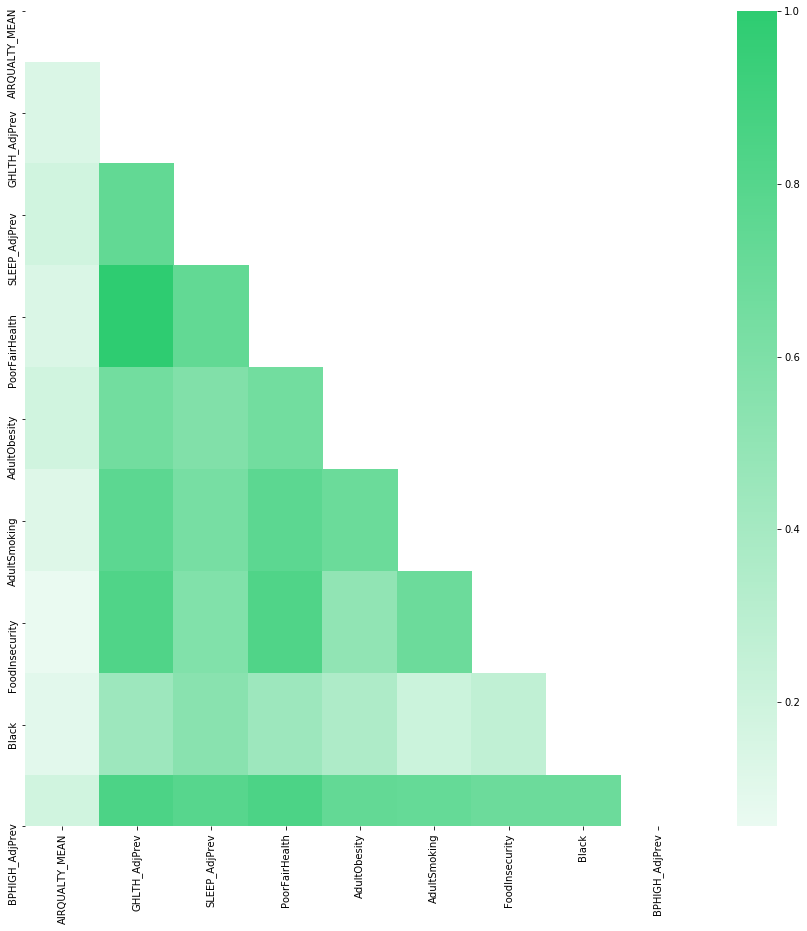

In [17]:
#selected variables (refining to avoid highly correlated independent variables/multicolineraity)

dfs_mc = dfs[['AIRQUALTY_MEAN','GHLTH_AdjPrev','SLEEP_AdjPrev','PoorFairHealth',
                 'AdultObesity','AdultSmoking','FoodInsecurity','Black','BPHIGH_AdjPrev']]

corr = dfs_mc.corr().abs() # absolute value of Pearson's r
display(corr)


# these lines will create mask so the top triangle of the heatmap is not seen, which is a mirror of the bottom.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# nicer colormap
cmap = sns.light_palette("#2ecc71", as_cmap=True)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)

sns.heatmap(corr, ax=ax1, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap)

# Ordinary Least Squares (OLS)/Linear Regression

Ordinary Least Squares (OLS) regression to evaluate strength of explanatory variables and to aid in the reduction of variables. 

In [22]:
datav1 = dfs_mc[['AIRQUALTY_MEAN','GHLTH_AdjPrev','SLEEP_AdjPrev',
                 'AdultObesity','AdultSmoking','FoodInsecurity','Black']]


mod = sm.OLS(dfs_mc['BPHIGH_AdjPrev'], sm.add_constant(datav1))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         BPHIGH_AdjPrev   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3966.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:24:56   Log-Likelihood:                -5496.5
No. Observations:                3033   AIC:                         1.101e+04
Df Residuals:                    3025   BIC:                         1.106e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4034      0.371     22.

In [23]:
datav2 = dfs_mc[['AIRQUALTY_MEAN','SLEEP_AdjPrev','AdultObesity','FoodInsecurity']]

mod = sm.OLS(dfs_mc['BPHIGH_AdjPrev'], sm.add_constant(datav2))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         BPHIGH_AdjPrev   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     2670.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:25:04   Log-Likelihood:                -6724.9
No. Observations:                3033   AIC:                         1.346e+04
Df Residuals:                    3028   BIC:                         1.349e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5586      0.450    -10.

In [24]:
datav3 = dfs_mc[['AIRQUALTY_MEAN','SLEEP_AdjPrev','AdultSmoking','FoodInsecurity']]

mod = sm.OLS(dfs_mc['BPHIGH_AdjPrev'], sm.add_constant(datav3))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         BPHIGH_AdjPrev   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2099.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:26:14   Log-Likelihood:                -7001.4
No. Observations:                3033   AIC:                         1.401e+04
Df Residuals:                    3028   BIC:                         1.404e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5717      0.462      1.

In [26]:
datav4 = dfs_mc[['AIRQUALTY_MEAN','GHLTH_AdjPrev','SLEEP_AdjPrev','AdultSmoking','FoodInsecurity']]

mod = sm.OLS(dfs_mc['BPHIGH_AdjPrev'], sm.add_constant(datav4))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         BPHIGH_AdjPrev   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2194.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:28:05   Log-Likelihood:                -6692.6
No. Observations:                3033   AIC:                         1.340e+04
Df Residuals:                    3027   BIC:                         1.343e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8560      0.449     10.

In [27]:
datav5 = dfs_mc[['AIRQUALTY_MEAN','GHLTH_AdjPrev','SLEEP_AdjPrev','FoodInsecurity']]


mod = sm.OLS(dfs_mc['BPHIGH_AdjPrev'], sm.add_constant(datav5))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         BPHIGH_AdjPrev   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2648.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:32:03   Log-Likelihood:                -6734.6
No. Observations:                3033   AIC:                         1.348e+04
Df Residuals:                    3028   BIC:                         1.351e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2589      0.453     11.

The six variables that provided the highest explanitory strength for high blood pressure were the following independent/predictor variables: **PM2.5 Air Quality (`AIRQUALTY_MEAN`), Fair Or Poor Health (`GHLTH_AdjPrev`), 'Sleep (`SLEEP_AdjPrev`), Adult Obesity (`AdultObesity`), Adult Smoking (`AdultSmoking`),** and **Food Insecurity (`FoodInsecurity`)**

<br>AIRQUALTY_MEAN - air quality yearly average PM 2.5 
<br>GHLTH_AdjPrev - Model-based estimate for age-adjusted prevalence of **fair or poor health** among adults aged >=18 years
<br>SLEEP_AdjPrev - Model-based estimate for age-adjusted prevalence of **sleeping** less than 7 hours among adults aged >=18 years, 2020
<br>AdultObesity - Percentage of the adult population (age 20 and older) that reports a **body mass index (BMI)** greater than or equal to 30 kg/m2.
<br>AdultSmoking - Percentage of adults who are current **smokers**
<br>FoodInsecurity - Percentage of population who **lack adequate access to food**.	